<a href="https://colab.research.google.com/github/evi03/PCVK_Semester5/blob/main/week10_PCVK_Evi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KELOMPOK 2**

**Nama: Evi Amalia Midfia**

**Kelas: TI-3A**

**ABSEN: 13**

**NIM: 2141720030**

# **PRAKTIKUM**

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week10.ipynb”.

Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [25]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di bawah.

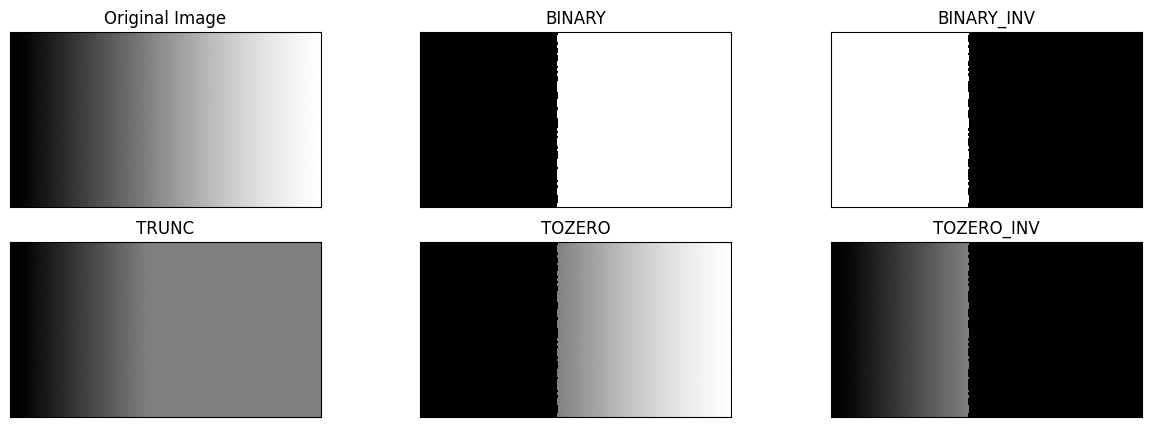

In [26]:
# Code Berikut menunjukkan penggunaan dari library OpenCV cv.Threshold

filename = ('/content/drive/MyDrive/Tugas Kuliah /PCVK/week10/gradient.jpg')
img = cv.imread(filename)
thresh = 127 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

<ipython-input-27-d42874365d6d>:22: RuntimeWarning: invalid value encountered in divide
  mb = sumb / wb


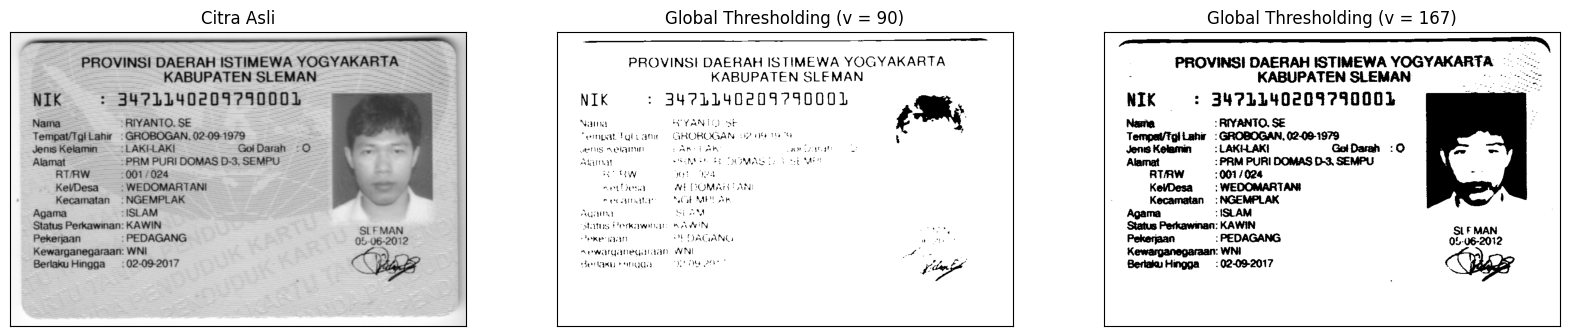

In [27]:
# Berikut adalah contoh code untuk Adaptive Threshold.

dir = ('/content/drive/MyDrive/Tugas Kuliah /PCVK/week10/KTP.jpg')

img = cv.imread(dir,0)
blur = cv. GaussianBlur (img, (5,5),0)

histogram = cv.calcHist([blur],[0],None,[256], [0,256])
histogram_norm = histogram.ravel()/histogram.max()
Q = histogram_norm.cumsum()
bins = np.arange (256)
wb = 0
sumb = 0
varmax = 0
fn_min = np.inf
threshold = -1

for i in range(0,255):
  wb += histogram[i]
  wf = (img.shape[0]*img.shape[1]) - wb
  sumb += (i*histogram[i])
  mb = sumb / wb
  mf = (sumb - sumb)/wf
  betweenvar = wb * wf * (mb - mf) * (mb - mf)
  if (betweenvar>varmax):
    varmax = betweenvar
    threshold = i

x = ("Otsu's Thresholding (v = ")+str(threshold)+")"
ret, thresholdGlobal = cv.threshold(blur, 90, 255, cv.THRESH_BINARY)  # Ubah 127 menjadi 90
ret, thresholdOtsu = cv.threshold(blur, 167, 255, cv.THRESH_BINARY)  # Ubah nilai threshold Otsu menjadi 167


names = ['Citra Asli', 'Global Thresholding (v = 90)', 'Global Thresholding (v = 167)']
images = [blur, thresholdGlobal, thresholdOtsu]

plt. figure(figsize = (20,15))
for i in range(len(names)):
    plt.subplot(1,3,i+1),plt.imshow(images[i], 'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.
Petunjuk:

* anda dapat gunakan cv.calcHist untuk menampilkan histogram.

* Buka link berikut https://opencv-tutorial.readthedocs.io/en/latest/histogram/histogram.html

* Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).

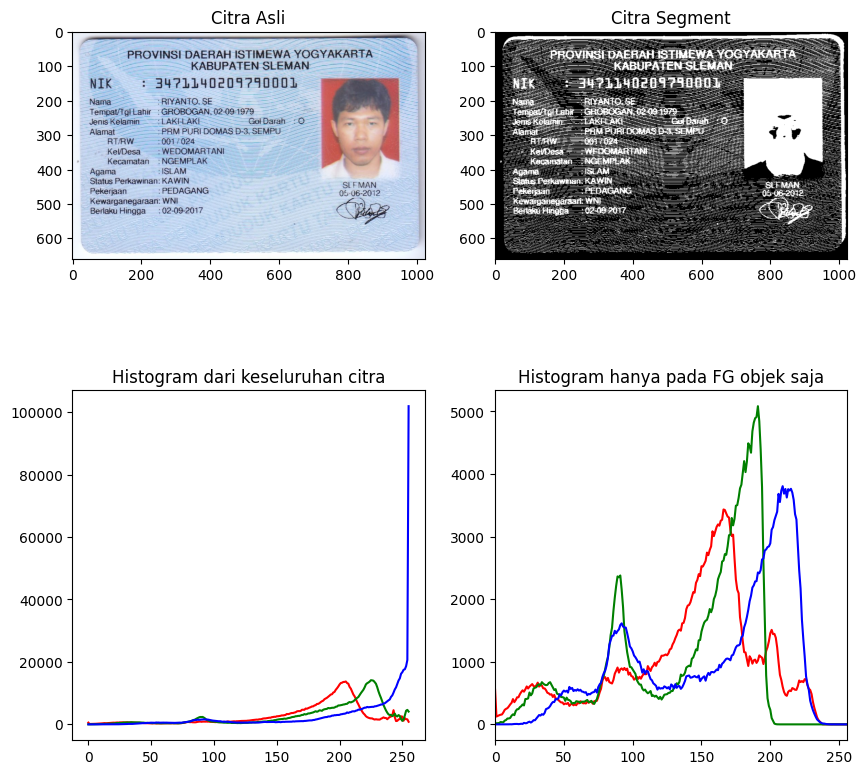

In [28]:
dir = ('/content/drive/MyDrive/Tugas Kuliah /PCVK/week10/KTP.jpg')

img = cv.imread(dir)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

ret,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')
for i,col in enumerate(color):
    histogramSeluruhCitra = cv.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(histogramSeluruhCitra,color = col)
    plt.title('Histogram dari keseluruhan citra')
    histogramForeground = cv.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(histogramForeground,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])
plt.show()

6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

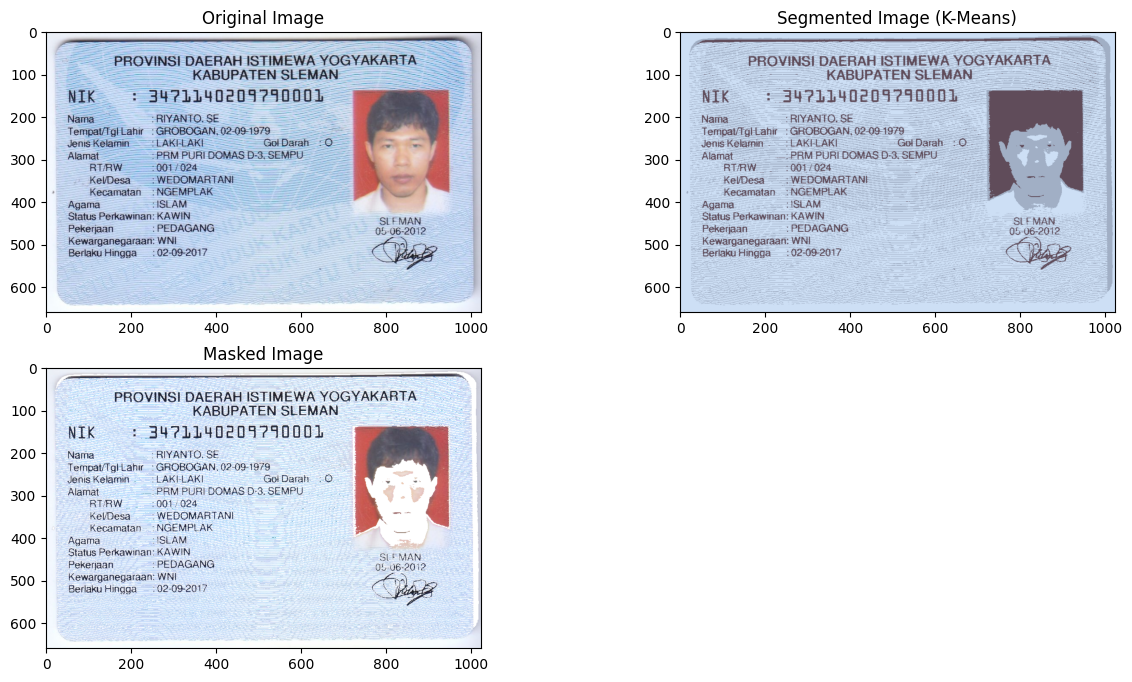

In [29]:
from sklearn.cluster import KMeans

# Load the image
filename = '/content/drive/MyDrive/Tugas Kuliah /PCVK/week10/KTP.jpg'
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Flatten the pixel values
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of clusters

# Apply K-Means clustering
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(img.shape)

masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 2
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(img.shape)

# Display the original image, segmented image, and masked image
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Original Image')

plt.subplot(2, 2, 2), plt.imshow(segmented_image)
plt.title('Segmented Image (K-Means)')

plt.subplot(2, 2, 3), plt.imshow(masked_image)
plt.title('Masked Image')

plt.show()

# **TUGAS**

Tugasnya adalah mengimplementasikan thresholding dengan beberapa metode yang telah Anda ketahui untuk melakukan segmentasi pada dataset KTP pertemuan 7.

In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab
import os
import random
from sklearn.cluster import KMeans

In [31]:
directory = "/content/drive/MyDrive/Tugas Kuliah /PCVK/KTP"

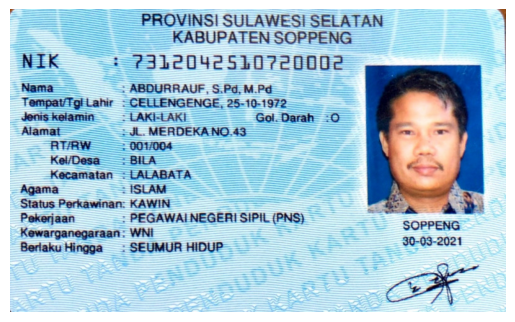

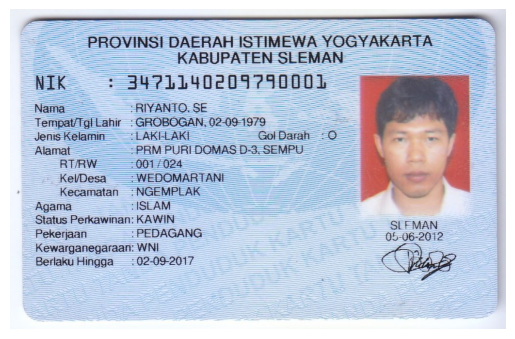

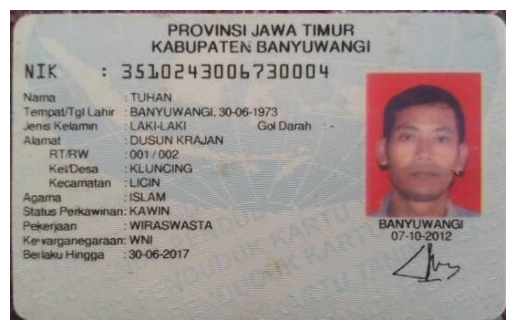

In [32]:
# Mengambil File dari variabel directory
image_files = [file for file in os.listdir(directory) if file.endswith((".jpg", ".jpeg", ".png"))]

# Loop melalui semua gambar dalam direktori
for img_file in image_files:
    img_path = os.path.join(directory, img_file)

    img = cv2.imread(img_path)

    # Tampilkan gambar
    plt.figure()
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()


**Global Threshold**

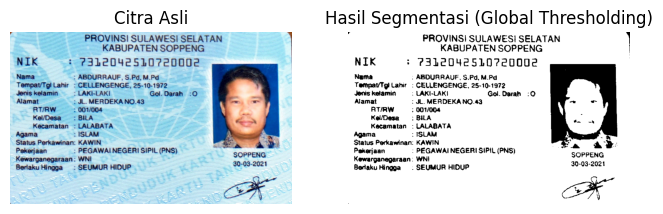

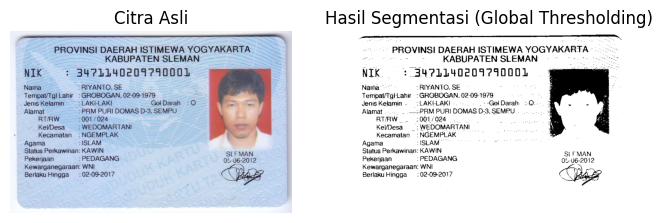

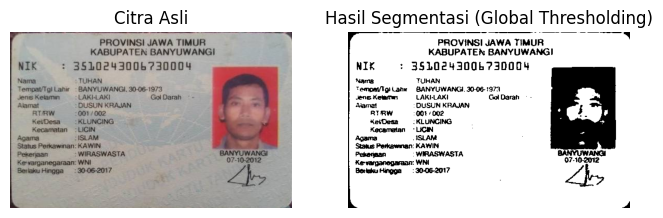

In [33]:
# Loop melalui semua gambar dalam direktori
for img_file in image_files:
    img_path = os.path.join(directory, img_file)

    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Melakukan global thresholding
    ret, thresholded = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Menampilkan gambar asli dan hasil segmentasi
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Citra Asli')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Hasil Segmentasi (Global Thresholding)')
    plt.axis('off')

    plt.show()

**Adaptive Threshold**

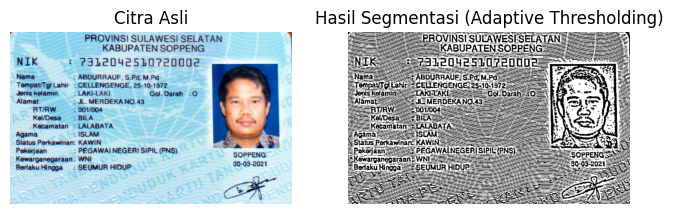

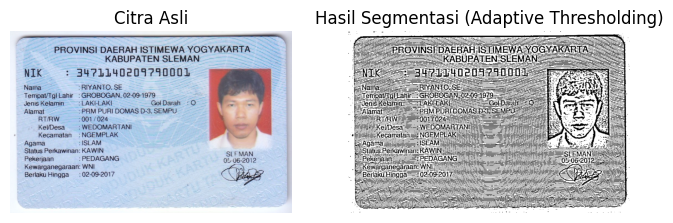

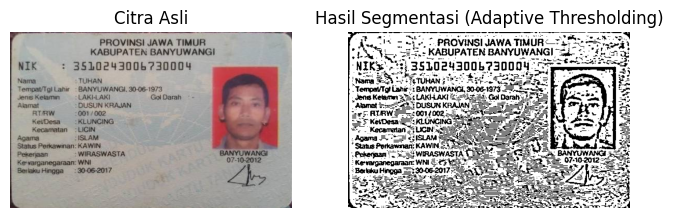

In [34]:
# Loop melalui semua gambar dalam direktori
for img_file in image_files:
    img_path = os.path.join(directory, img_file)

    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Melakukan adaptive thresholding
    thresholded = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Menampilkan gambar asli dan hasil segmentasi
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Citra Asli')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Hasil Segmentasi (Adaptive Thresholding)')
    plt.axis('off')

    plt.show()

**Otsu's Threshold**

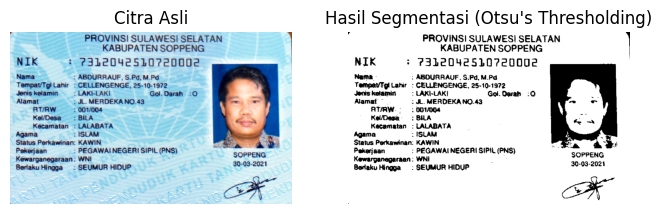

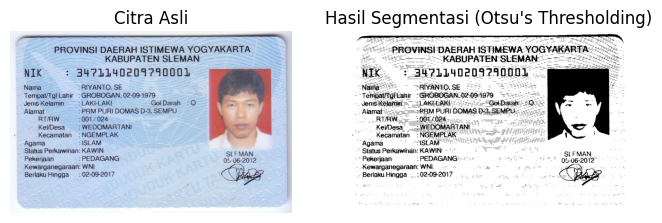

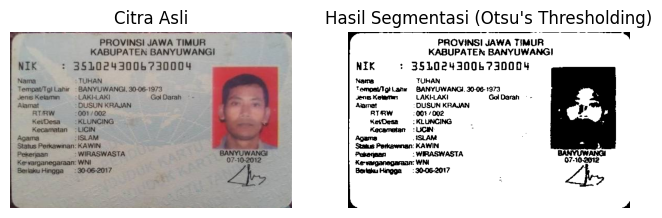

In [35]:
# Loop melalui semua gambar dalam direktori
for img_file in image_files:
    img_path = os.path.join(directory, img_file)

    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Melakukan Otsu's Thresholding
    _, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Menampilkan gambar asli dan hasil segmentasi
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Citra Asli')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Hasil Segmentasi (Otsu\'s Thresholding)')
    plt.axis('off')

    plt.show()

**Menggunakan Pengenalan Segmentasi Citra menggunakan K-MeansMenggunakan Pengenalan Segmentasi Citra menggunakan K-Meansa**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


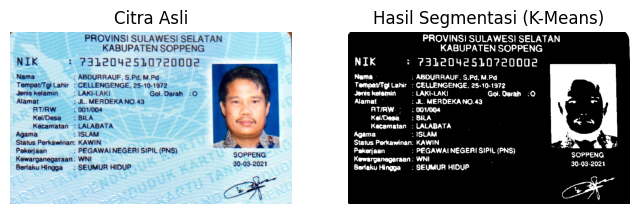

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


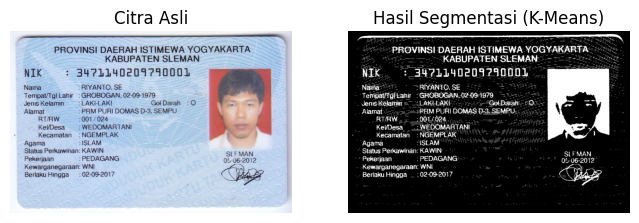

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


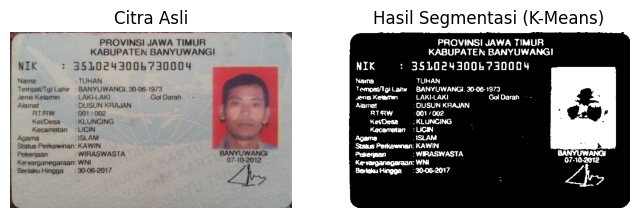

In [36]:
from sklearn.cluster import KMeans
# Loop melalui semua gambar dalam direktori
for img_file in image_files:
    img_path = os.path.join(directory, img_file)

    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Melakukan Otsu's Thresholding
    _, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Ubah citra ke format yang dapat dikerjakan oleh K-Means
    img_flat = img.reshape((-1, 3))
    img_flat = np.float32(img_flat)

    # K-Means
    kmeans = KMeans(n_clusters=2, random_state=0)
    labels = kmeans.fit_predict(img_flat)
    segmented = labels.reshape(img.shape[0], img.shape[1])

    # Menampilkan gambar asli dan hasil segmentasi K-Means
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Citra Asli')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(segmented, cmap='gray')
    plt.title('Hasil Segmentasi (K-Means)')
    plt.axis('off')

    plt.show()